In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv('divorce.csv')
data

,Unnamed: 0,year,date,all_3544,HS_3544,SC_3544,BAp_3544,BAo_3544,GD_3544,poor_3544,...,rich_3544,all_4554,HS_4554,SC_4554,BAp_4554,BAo_4554,GD_4554,poor_4554,mid_4554,rich_4554
0,1,1960,1960-01-01,0.034445,0.034889,0.033669,0.027513,0.027513,NaN,0.071951,...,0.022562,0.039651,0.040071,0.038703,0.031886,0.031886,NaN,0.075373,0.029337,0.023505
1,2,1970,1970-01-01,0.049256,0.050000,0.048705,0.041259,0.041259,NaN,0.113736,...,0.021927,0.050626,0.050566,0.051473,0.048311,0.048311,NaN,0.112496,0.033869,0.021233
2,3,1980,1980-01-01,0.106005,0.104151,0.112699,0.097772,0.097772,NaN,0.241647,...,0.035015,0.088185,0.085664,0.095009,0.091035,0.091035,NaN,0.198673,0.063009,0.027916
3,4,1990,1990-01-01,0.150805,0.159381,0.169670,0.114955,0.118534,0.109145,0.326948,...,0.049725,0.145726,0.140779,0.166331,0.134370,0.135661,0.132741,0.306614,0.114981,0.045775
4,5,2000,2000-01-01,0.156841,0.175446,0.173803,0.105618,0.110540,0.095903,0.343089,...,0.049395,0.179581,0.184777,0.201104,0.149042,0.153693,0.142550,0.382135,0.142242,0.051525
5,6,2001,2001-01-01,0.157306,0.174116,0.178169,0.107039,0.111861,0.097197,0.342836,...,0.040574,0.182651,0.190237,0.205737,0.148632,0.153269,0.141745,0.390039,0.146513,0.045222
6,7,2002,2002-01-01,0.156508,0.174769,0.179294,0.103442,0.109690,0.090763,0.341088,...,0.038796,0.180650,0.192090,0.198048,0.146439,0.152888,0.136777,0.383795,0.146242,0.046089
7,8,2003,2003-01-01,0.153844,0.172545,0.176975,0.102550,0.110683,0.086385,0.333105,...,0.039262,0.184698,0.194891,0.206792,0.147350,0.151223,0.141439,0.391315,0.151240,0.042694
8,9,2004,2004-01-01,0.154841,0.177565,0.177080,0.100337,0.105990,0.089114,0.334328,...,0.036796,0.184111,0.193739,0.208312,0.145630,0.151841,0.135796,0.391199,0.150755,0.041060
9,10,2005,2005-01-01,0.152920,0.175164,0.176743,0.099481,0.107115,0.084992,0.329074,...,0.037071,0.184325,0.197213,0.205276,0.143482,0.147395,0.137305,0.389394,0.150802,0.042773


In [3]:
data.drop(['Unnamed: 0', 'date', 'HS_3544', 'SC_3544', 'BAp_3544', 'BAo_3544', 'HS_4554', 'SC_4554', 'BAp_4554', 'BAo_4554'], axis = 1, inplace = True)

In [4]:
data

,year,all_3544,GD_3544,poor_3544,mid_3544,rich_3544,all_4554,GD_4554,poor_4554,mid_4554,rich_4554
0,1960,0.034445,NaN,0.071951,0.021225,0.022562,0.039651,NaN,0.075373,0.029337,0.023505
1,1970,0.049256,NaN,0.113736,0.030301,0.021927,0.050626,NaN,0.112496,0.033869,0.021233
2,1980,0.106005,NaN,0.241647,0.073672,0.035015,0.088185,NaN,0.198673,0.063009,0.027916
3,1990,0.150805,0.109145,0.326948,0.111910,0.049725,0.145726,0.132741,0.306614,0.114981,0.045775
4,2000,0.156841,0.095903,0.343089,0.116584,0.049395,0.179581,0.142550,0.382135,0.142242,0.051525
5,2001,0.157306,0.097197,0.342836,0.122781,0.040574,0.182651,0.141745,0.390039,0.146513,0.045222
6,2002,0.156508,0.090763,0.341088,0.119926,0.038796,0.180650,0.136777,0.383795,0.146242,0.046089
7,2003,0.153844,0.086385,0.333105,0.121047,0.039262,0.184698,0.141439,0.391315,0.151240,0.042694
8,2004,0.154841,0.089114,0.334328,0.121930,0.036796,0.184111,0.135796,0.391199,0.150755,0.041060
9,2005,0.152920,0.084992,0.329074,0.122404,0.037071,0.184325,0.137305,0.389394,0.150802,0.042773


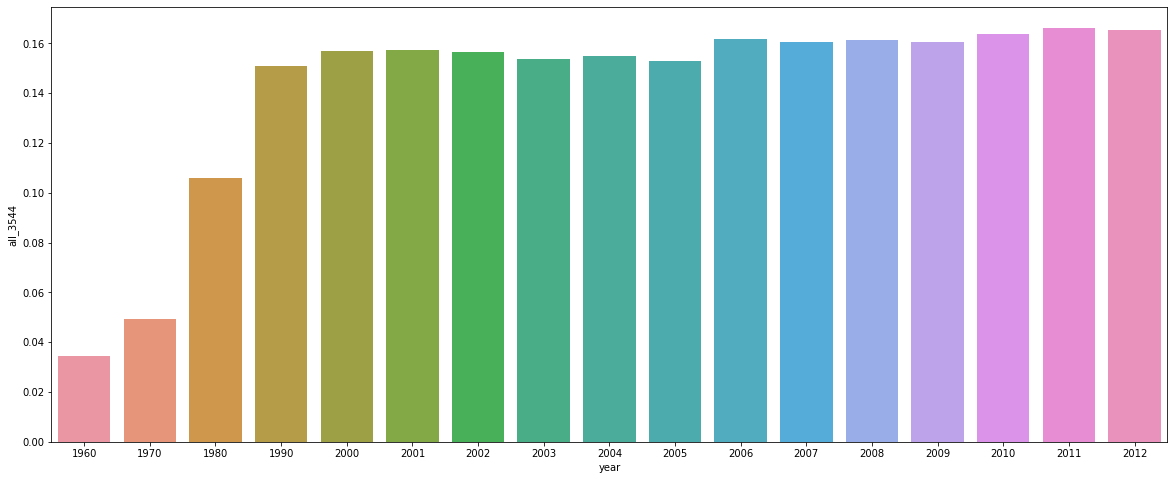

In [5]:
plt.figure(figsize=[20,8])
sns.barplot('year', 'all_3544', data=data)

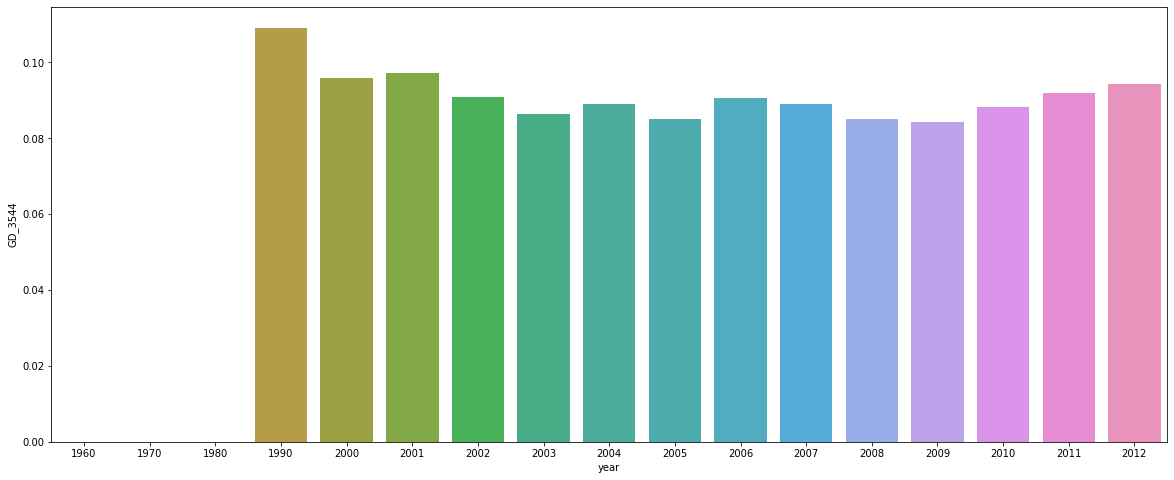

In [6]:
plt.figure(figsize=[20,8])
sns.barplot('year', 'GD_3544', data=data)

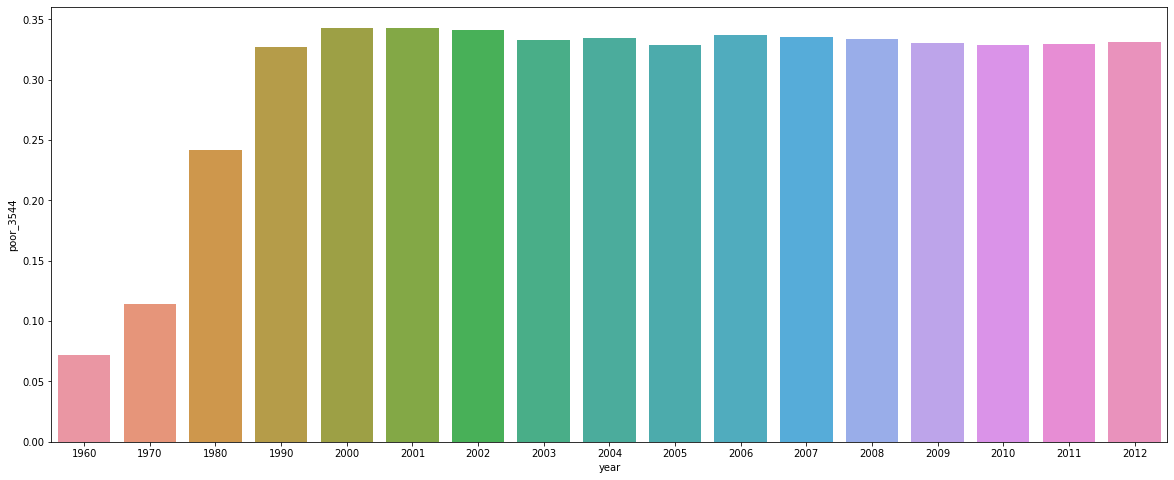

In [7]:
plt.figure(figsize=[20,8])
sns.barplot('year', 'poor_3544', data=data)

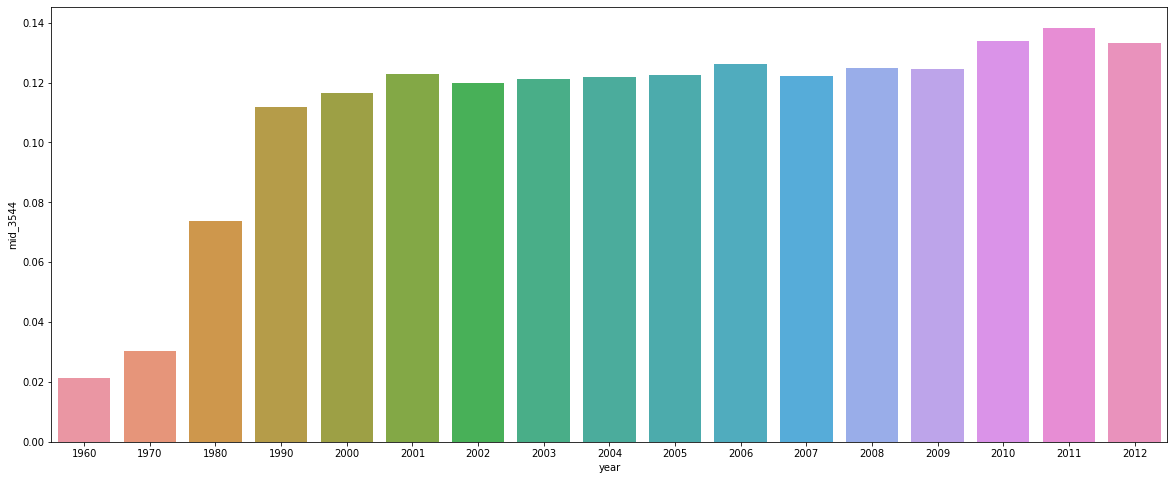

In [8]:
plt.figure(figsize=[20,8])
sns.barplot('year', 'mid_3544', data=data)

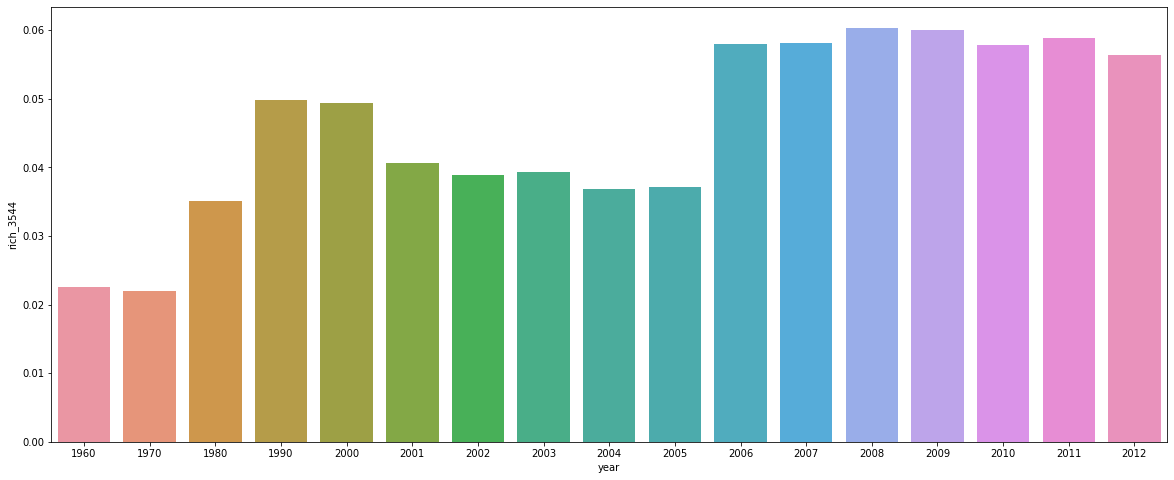

In [9]:
plt.figure(figsize=[20,8])
sns.barplot('year', 'rich_3544', data=data)

In [10]:
y = pd.DataFrame(data['all_3544'])
y

,all_3544
0,0.034445
1,0.049256
2,0.106005
3,0.150805
4,0.156841
5,0.157306
6,0.156508
7,0.153844
8,0.154841
9,0.152920


In [11]:
x = pd.DataFrame(data[['year', 'GD_3544', 'poor_3544', 'mid_3544', 'rich_3544']])
x

,year,GD_3544,poor_3544,mid_3544,rich_3544
0,1960,NaN,0.071951,0.021225,0.022562
1,1970,NaN,0.113736,0.030301,0.021927
2,1980,NaN,0.241647,0.073672,0.035015
3,1990,0.109145,0.326948,0.111910,0.049725
4,2000,0.095903,0.343089,0.116584,0.049395
5,2001,0.097197,0.342836,0.122781,0.040574
6,2002,0.090763,0.341088,0.119926,0.038796
7,2003,0.086385,0.333105,0.121047,0.039262
8,2004,0.089114,0.334328,0.121930,0.036796
9,2005,0.084992,0.329074,0.122404,0.037071


In [12]:
x.describe()

,year,GD_3544,poor_3544,mid_3544,rich_3544
count,17.000000,14.000000,17.000000,17.000000,17.000000
mean,1998.705882,0.091215,0.300222,0.109692,0.045908
std,15.044786,0.006524,0.081657,0.034481,0.012909
min,1960.000000,0.084393,0.071951,0.021225,0.021927
25%,2000.000000,0.086830,0.328724,0.116584,0.037071
50%,2004.000000,0.089808,0.331560,0.122209,0.049395
75%,2008.000000,0.093706,0.335230,0.124718,0.057895
max,2012.000000,0.109145,0.343089,0.138364,0.060336


In [13]:
#x.replace('NaN', 0.091215), it didnt work, don't know why, i'll find out later
x = x.fillna(0.091215)
x

,year,GD_3544,poor_3544,mid_3544,rich_3544
0,1960,0.091215,0.071951,0.021225,0.022562
1,1970,0.091215,0.113736,0.030301,0.021927
2,1980,0.091215,0.241647,0.073672,0.035015
3,1990,0.109145,0.326948,0.111910,0.049725
4,2000,0.095903,0.343089,0.116584,0.049395
5,2001,0.097197,0.342836,0.122781,0.040574
6,2002,0.090763,0.341088,0.119926,0.038796
7,2003,0.086385,0.333105,0.121047,0.039262
8,2004,0.089114,0.334328,0.121930,0.036796
9,2005,0.084992,0.329074,0.122404,0.037071


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 42)

In [15]:
x_train

,year,GD_3544,poor_3544,mid_3544,rich_3544
11,2007,0.089050,0.335230,0.122209,0.058169
14,2010,0.088167,0.328724,0.133820,0.057761
8,2004,0.089114,0.334328,0.121930,0.036796
13,2009,0.084393,0.330015,0.124684,0.059975
2,1980,0.091215,0.241647,0.073672,0.035015
9,2005,0.084992,0.329074,0.122404,0.037071
16,2012,0.094314,0.331560,0.133077,0.056355
4,2000,0.095903,0.343089,0.116584,0.049395
7,2003,0.086385,0.333105,0.121047,0.039262
10,2006,0.090503,0.337167,0.126109,0.057895


In [16]:
x_test

,year,GD_3544,poor_3544,mid_3544,rich_3544
0,1960,0.091215,0.071951,0.021225,0.022562
1,1970,0.091215,0.113736,0.030301,0.021927
5,2001,0.097197,0.342836,0.122781,0.040574
15,2011,0.091883,0.329541,0.138364,0.058814


In [17]:
y_train

,all_3544
11,0.160469
14,0.163651
8,0.154841
13,0.160493
2,0.106005
9,0.152920
16,0.165486
4,0.156841
7,0.153844
10,0.161890


In [18]:
y_test

,all_3544
0,0.034445
1,0.049256
5,0.157306
15,0.166303


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
ypred = regressor.predict(x_test)

In [23]:
ypred

array([[0.03494478],
       [0.05189984],
       [0.15836921],
       [0.16669364]])

In [24]:
y_pred  = pd.DataFrame(ypred)
y_pred

,0
0,0.034945
1,0.051900
2,0.158369
3,0.166694
